In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
sns.set(style = 'darkgrid')

In [3]:
df = pd.read_csv(r"Downloads/devices.csv")

In [4]:
df

,Age,Age_Category,Gender,Occupational_Status,Annual_Salary,Device_Used
0,21,21-30,Female,Student,NaN,Laptop
1,21,21-30,Female,Student,NaN,Smartphone
2,19,11-20,Male,Student,NaN,Laptop
3,19,11-20,Male,Student,NaN,Smartphone
4,34,31-40,Male,Employed,more than 9 lakhs,TV
...,...,...,...,...,...,...
692,21,21-30,Female,Employed,between 1 and 3 lakhs,Laptop
693,21,21-30,Female,Employed,between 1 and 3 lakhs,Smartphone
694,22,21-30,Male,Employed,more than 9 lakhs,Smartphone
695,23,21-30,Female,Student,NaN,Laptop


In [5]:
df.sample(7)

,Age,Age_Category,Gender,Occupational_Status,Annual_Salary,Device_Used
148,26,21-30,Male,Employed,between 3 and 6 lakhs,TV
694,22,21-30,Male,Employed,more than 9 lakhs,Smartphone
524,22,21-30,Male,Student,NaN,Laptop
483,26,21-30,Female,Employed,more than 9 lakhs,Laptop
541,21,21-30,Male,Student,NaN,Laptop
428,21,21-30,Female,Student,NaN,Smartphone
585,33,31-40,Male,Employed,between 3 and 6 lakhs,Smartphone


In [6]:
df.isnull().sum()

Age                      0
Age_Category             0
Gender                   0
Occupational_Status      0
Annual_Salary          507
Device_Used              0
dtype: int64

In [7]:
df.nunique()

Age                    46
Age_Category            6
Gender                  3
Occupational_Status     6
Annual_Salary           5
Device_Used             4
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 697 entries, 0 to 696
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  697 non-null    int64 
 1   Age_Category         697 non-null    object
 2   Gender               697 non-null    object
 3   Occupational_Status  697 non-null    object
 4   Annual_Salary        190 non-null    object
 5   Device_Used          697 non-null    object
dtypes: int64(1), object(5)
memory usage: 32.8+ KB


In [9]:
df.describe()

,Age
count,697.000000
mean,24.276901
std,8.292563
min,10.000000
25%,21.000000
50%,22.000000
75%,23.000000
max,66.000000


In [10]:
df.corr()

,Age
Age,1.0


In [11]:
df['Age'].value_counts()

21    180
22    117
20     83
23     70
19     31
24     22
26     19
25     14
27     14
18     14
28     13
34     11
17     11
47      9
49      7
15      7
40      5
31      5
29      4
30      4
33      4
16      3
46      3
45      3
50      3
12      3
37      3
52      3
14      3
48      3
35      3
64      2
53      2
32      2
44      2
38      2
36      2
60      2
62      2
65      1
10      1
56      1
55      1
51      1
41      1
66      1
Name: Age, dtype: int64

<AxesSubplot:>

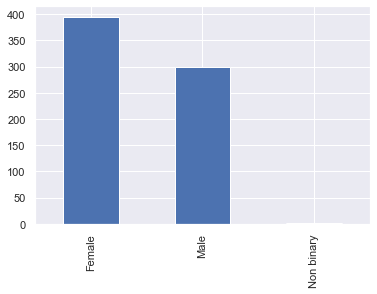

In [12]:
df['Gender'].value_counts().plot(kind = 'bar' , x = 'Gender')

<AxesSubplot:>

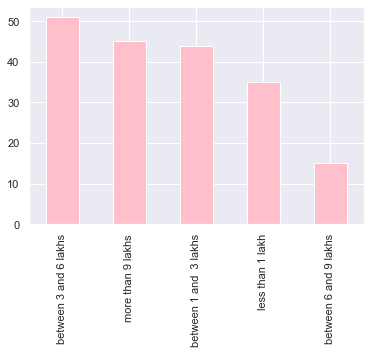

In [13]:
df['Annual_Salary'].value_counts().plot(kind = 'bar' , x = 'annual_salary', color = 'pink')

In [14]:
sns.set(rc={'figure.figsize':(15,10)})

<AxesSubplot:xlabel='Device_Used', ylabel='Age'>

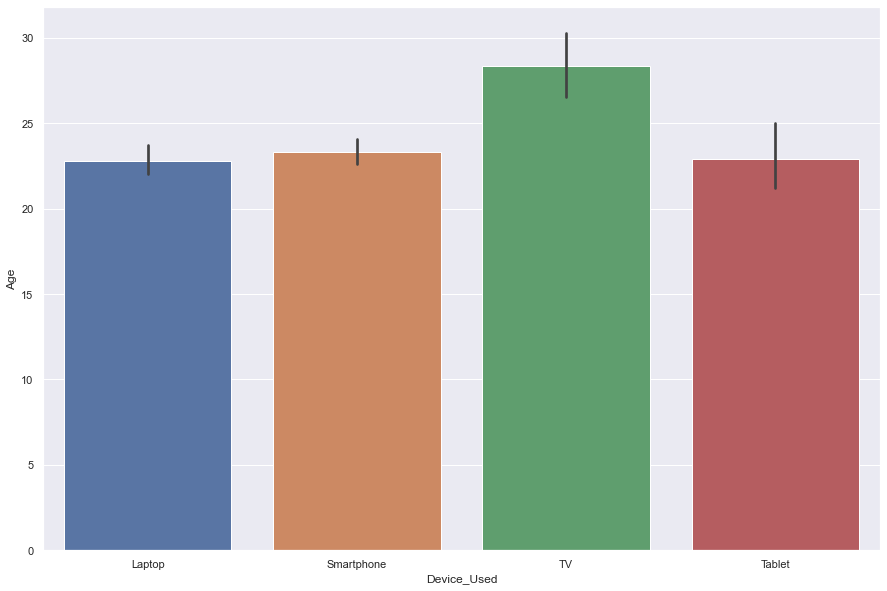

In [17]:
sns.barplot(x = "Device_Used", y = "Age", data = df)

<AxesSubplot:xlabel='Device_Used', ylabel='Age'>

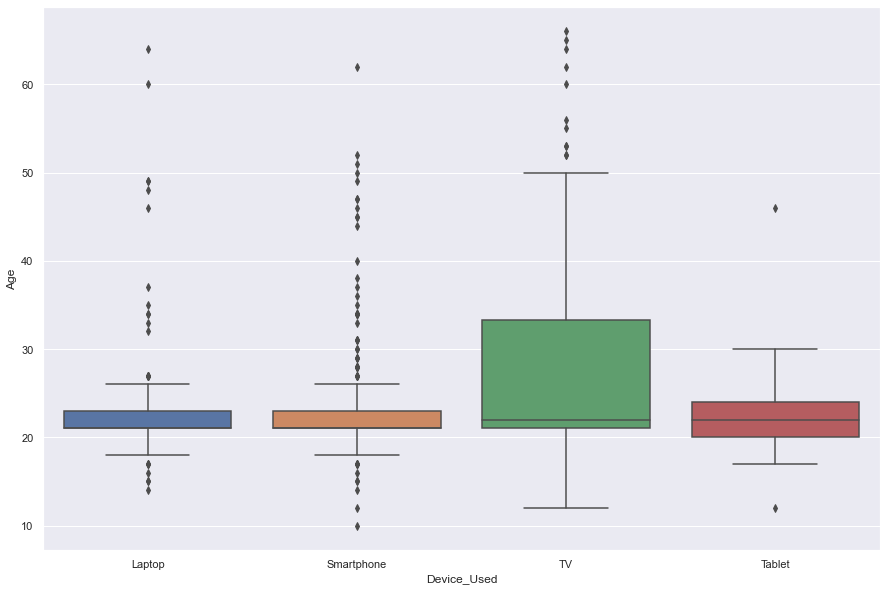

In [19]:
sns.boxplot(x = "Device_Used", y = "Age", data = df)

In [20]:
sns.set(rc={'figure.figsize':(20,8.27)})

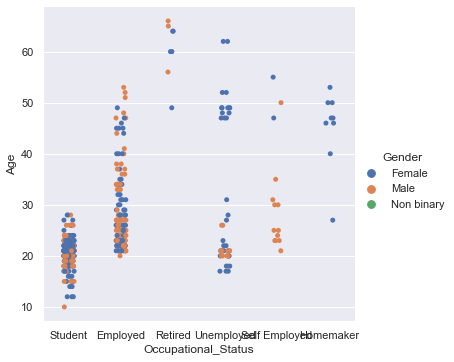

In [21]:
sns.catplot(x = "Occupational_Status", y = "Age", hue= "Gender", data = df)

In [25]:
df1 = pd.read_csv(r"Downloads/train.csv")

df1

In [26]:
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
709,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
710,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
711,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
712,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Cabin        185 non-null    object 
 11  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 67.1+ KB


In [28]:
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          529
Embarked         2
dtype: int64

In [29]:
X = df1[[ 'PassengerId','Pclass','SibSp','Age','Fare']]
y = df1['Survived']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [31]:
lgr = LogisticRegression(random_state=0)

In [32]:
lgr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [33]:
print('Coefficient : ',lgr.coef_)
print('Intercept : ',lgr.intercept_)

Coefficient :  [[ 4.25426247e-04 -1.06854330e+00 -2.31264056e-01 -5.27061858e-02
   5.50464712e-03]]
Intercept :  [3.26746401]


In [34]:
prediction = lgr.predict(X_test)
prediction

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1], dtype=int64)

In [35]:
lgr.score(X_train, y_train)

0.7075306479859895

In [36]:
lgr.score(X_test, y_test)

0.6853146853146853

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

CONFUSION MATRIX



In [39]:
cm = confusion_matrix(y_test, prediction)
print(cm)

[[73 14]
 [31 25]]


PRECISION

In [40]:
from sklearn.metrics import precision_score
Precision = precision_score(y_test,prediction)
print("Precision : " , Precision)

Precision :  0.6410256410256411


RECALL

In [41]:
from sklearn.metrics import recall_score
Recall = recall_score(y_test,prediction)
print('Recall : ',Recall)

Recall :  0.44642857142857145


In [42]:
metrics.classification_report(y_test, prediction)

'              precision    recall  f1-score   support\n\n           0       0.70      0.84      0.76        87\n           1       0.64      0.45      0.53        56\n\n    accuracy                           0.69       143\n   macro avg       0.67      0.64      0.65       143\nweighted avg       0.68      0.69      0.67       143\n'

F1 SCORE

In [43]:
f1 = (2*Precision*Recall)/(Precision + Recall)
print('F1-Score : ',f1)

F1-Score :  0.5263157894736842


SPECIFICITY

In [44]:
tn = 18
fp = 21

In [46]:
Specificity = tn/(tn+fp)
print("Specificity : ", Specificity)

Specificity :  0.46153846153846156


MISSCLASSIFICATION RATE 

In [48]:
fn = 78
total = 154

In [49]:
mis = (fn+fp)/total
print("Missclassification Rate : ", mis)

Missclassification Rate :  0.6428571428571429


ROC, AUROC

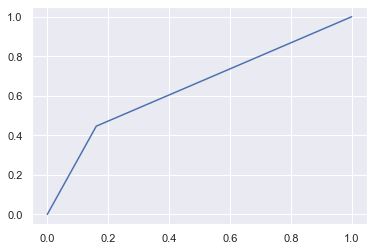

In [50]:
fp1,tp1,_ = metrics.roc_curve(y_test , prediction)
plt.plot(fp1,tp1)

In [51]:
aur = metrics.roc_auc_score(y_test , prediction)
print("AUROC : ", aur)

AUROC :  0.6427545155993432


SENSITIVITY

In [52]:
sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity1 )

Sensitivity :  0.8390804597701149
